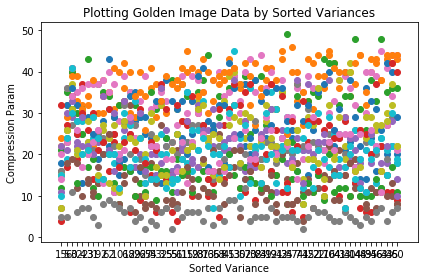

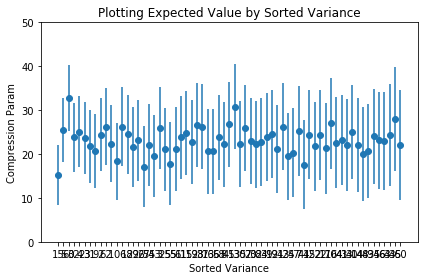

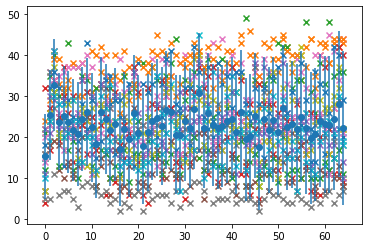

In [29]:
#
# The purpose of this script is to 
# make it ammenable to visually 
# inspect the data from the 
# golden image study.
#
# Author: MK Swaminathan
#

import os, sys
import cv2
import urllib
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# URL to IM Lib
from golden_im import *

# Import golden image data
golden_res = pd.read_csv('../../HIT-Support/dat/golden_results_new.csv')

dat = np.asarray([golden_res.loc[:,'Answer.slider_values'][i].split(',') 
    for i in range(len(golden_res.loc[:,'Answer.slider_values']))])[:,:-1].astype(int)

# Order by variances
var_i = np.argsort(np.var(dat, axis=0))


# Plot to inspect spread of data overall and expected value
for i in range(len(dat)):
    plt.scatter(np.arange(len(dat[0])), dat[i,var_i])

plt.xticks(np.arange(len(dat[0])), var_i)
plt.xlabel('Sorted Variance')
plt.ylabel('Compression Param')
plt.title('Plotting Golden Image Data by Sorted Variances')
plt.tight_layout()

plt.figure()

plt.errorbar(np.arange(len(dat[0])), np.mean(dat,axis=0)[var_i], np.std(dat, axis=0)[var_i], fmt='o')
plt.xticks(np.arange(len(dat[0])), var_i)
plt.ylim(0,50)
plt.xlabel('Sorted Variance')
plt.ylabel('Compression Param')
plt.title('Plotting Expected Value by Sorted Variance')
plt.tight_layout()

plt.figure()
for i in range(len(dat)):
    plt.scatter(np.arange(len(dat[0])), dat[i,var_i],marker='x')

plt.errorbar(np.arange(len(dat[0])), np.mean(dat,axis=0)[var_i], 1.5*np.std(dat, axis=0)[var_i], fmt='o')

plt.show()

65
65


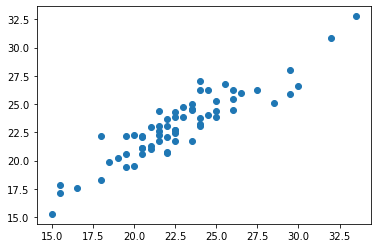

In [46]:
# This cell will attempt to apply compression ratios based on the std of the golden images
# and visualize what these results mean.

import cv2 as cv2_electric_boogaloo

outpath = 'Golden_JPEG/'

g_std = np.std(dat, axis=0)
g_mu = np.mean(dat, axis=0).reshape(-1, 1)
g_med = np.median(dat, axis=0).reshape(-1, 1)

print(len(g_med))
print(len(g_mu))
#print(g_med-g_mu)

#x = np.asarray([i for i in range(len(g_med))])

from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
X=g_med
y = g_mu
reg = LinearRegression().fit(X, y)
reg.score(g_med,g_mu)

#linregress(g_med,g_mu)
#plt.scatter(g_med,g_mu)
#plt.plot(g_med,g_mu)
plt.scatter(X,y)
n=0.5 #change standard deviation (half a deviation right now)

# for index in range(len(golden_names)):
#     img = get_im(golden_names[index])
#     img_path = outpath + golden_names[index][:-4]
    
#     print("writing to " + img_path)
    
#     cv2_electric_boogaloo.imwrite(img_path+"_h_n="+str(n)+".jpg", img, [cv2.IMWRITE_JPEG_QUALITY, g_mu[index]+n*g_std[index]])
#     cv2_electric_boogaloo.imwrite(img_path+"_l_n="+str(n)+".jpg", img, [cv2.IMWRITE_JPEG_QUALITY, g_mu[index]-n*g_std[index]])
#     cv2_electric_boogaloo.imwrite(img_path+"_m_n="+str(n)+".jpg", img, [cv2.IMWRITE_JPEG_QUALITY, g_mu[index]])